Download dataset from kaggle

In [160]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlippo/average-global-iq-per-country-with-other-stats")

print("Path to dataset files:", path)

Path to dataset files: /Users/Gala/.cache/kagglehub/datasets/mlippo/average-global-iq-per-country-with-other-stats/versions/3


Create path to file

In [ ]:
import os
import pandas as pd

# Create path to file 
csv_file_path = os.path.join(path, "avgIQpercountry.csv")

# Read data
df = pd.read_csv(csv_file_path)

# Print information about data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            193 non-null    int64  
 1   Country                         193 non-null    object 
 2   Average IQ                      193 non-null    float64
 3   Continent                       193 non-null    object 
 4   Literacy Rate                   193 non-null    float64
 5   Nobel Prices                    193 non-null    int64  
 6   HDI (2021)                      179 non-null    float64
 7   Mean years of schooling - 2021  179 non-null    float64
 8    GNI - 2021                     179 non-null    float64
 9   Population - 2023               193 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 15.2+ KB


,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352


Cleanup

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
import plotly.io as pio
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


import warnings
warnings.filterwarnings("ignore")

# Check missing data
print(df.isnull().sum())

# Filling in the gaps with median values
df['HDI (2021)'].fillna(df['HDI (2021)'].median(), inplace=True)
df['Mean years of schooling - 2021'].fillna(df['Mean years of schooling - 2021'].median(), inplace=True)
df[' GNI - 2021'].fillna(df[' GNI - 2021'].median(), inplace=True)

# Replace population column to numeric 
df['Population - 2023'] = pd.to_numeric(df['Population - 2023'].replace({',': ''}, regex=True), errors='coerce')


def clean_data(df):
    df['Population - 2023'] = pd.to_numeric(df['Population - 2023'], errors='coerce')
    df['Population - 2023'].fillna(0, inplace=True)  # Handle any NaNs after conversion
    df = df.astype({'Population - 2023': 'int64'})
    return df

df_clean = clean_data(df.copy())
df1 = df_clean.copy()

print("Data cleaned successfully!")

Rank                              0
Country                           0
Average IQ                        0
Continent                         0
Literacy Rate                     0
Nobel Prices                      0
HDI (2021)                        0
Mean years of schooling - 2021    0
 GNI - 2021                       0
Population - 2023                 1
Country_encoded                   0
Continent_encoded                 0
dtype: int64
Data cleaned successfully!


In [16]:
df.describe().round(2)

,Rank,Average IQ,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021
count,193.00,193.00,193.00,193.00,179.00,179.00,179.00
mean,97.00,82.05,0.86,5.92,0.72,9.03,20811.80
std,55.86,13.34,0.18,31.97,0.15,3.19,22160.49
min,1.00,42.99,0.19,0.00,0.38,2.10,732.00
25%,49.00,74.33,0.80,0.00,0.60,6.40,4593.00
50%,97.00,82.24,0.95,0.00,0.74,9.40,12672.00
75%,145.00,91.60,0.99,1.00,0.84,11.60,30588.00
max,193.00,106.48,1.00,400.00,0.96,14.10,146830.00


In [34]:
df.iloc[:, :].describe().T.sort_values(by='std', ascending=False)\
.style.bar(subset=["max"], color='blue')\
.bar(subset=["mean"], color='green')



,count,mean,std,min,25%,50%,75%,max
GNI - 2021,179.000000,20811.798883,22160.494888,732.000000,4593.000000,12672.000000,30588.000000,146830.000000
Rank,193.000000,97.000000,55.858452,1.000000,49.000000,97.000000,145.000000,193.000000
Nobel Prices,193.000000,5.922280,31.971328,0.000000,0.000000,0.000000,1.000000,400.000000
Average IQ,193.000000,82.047927,13.336117,42.990000,74.330000,82.240000,91.600000,106.480000
Mean years of schooling - 2021,179.000000,9.028492,3.187867,2.100000,6.400000,9.400000,11.600000,14.100000
Literacy Rate,193.000000,0.864249,0.180262,0.190000,0.800000,0.950000,0.990000,1.000000
HDI (2021),179.000000,0.724123,0.152761,0.385000,0.599500,0.745000,0.844000,0.962000


In [74]:
print(df.columns)

Index(['Rank', 'Country', 'Average IQ', 'Continent', 'Literacy Rate',
       'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021',
       ' GNI - 2021', 'Population - 2023', 'Country_encoded',
       'Continent_encoded'],
      dtype='object')


# Step 2: Analyze data and identify patterns

## 2.1. Сorrelation analysis

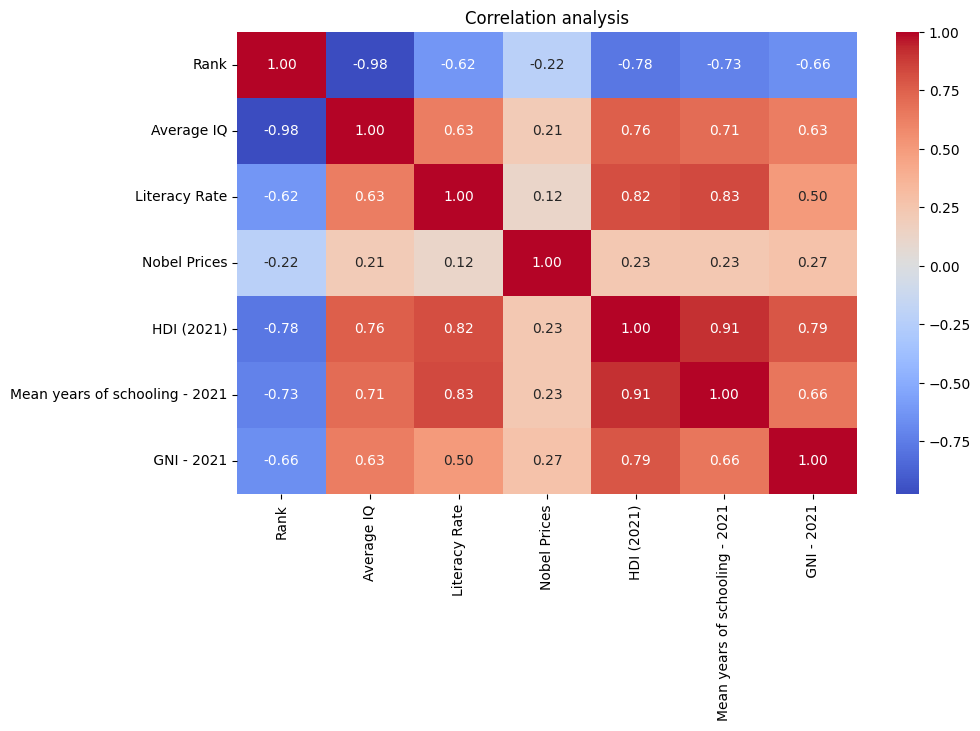

In [24]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Сorrelation analysis')
plt.show()



Positive Correlation (Values close to +1): When two variables have a correlation coefficient close to +1, they are positively correlated, meaning as one variable increases, the other tends to increase as well.
Negative Correlation (Values close to -1): A negative correlation means that as one variable increases, the other tends to decrease.

## 2.2. Visualization of IQ distribution across continents

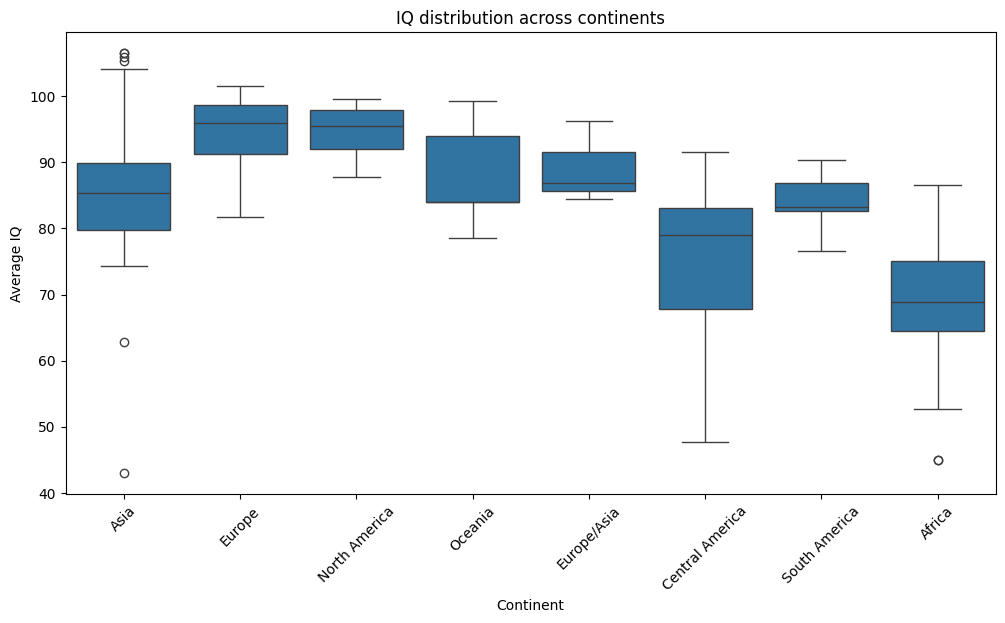

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Average IQ', data=df)
plt.title('IQ distribution across continents')
plt.xticks(rotation=45)
plt.show()



Hypothesis 1: Countries with higher literacy rates tend to have higher average IQs.

Rationale: Literacy is a fundamental skill, and higher literacy rates may correlate with improved cognitive abilities and educational outcomes.

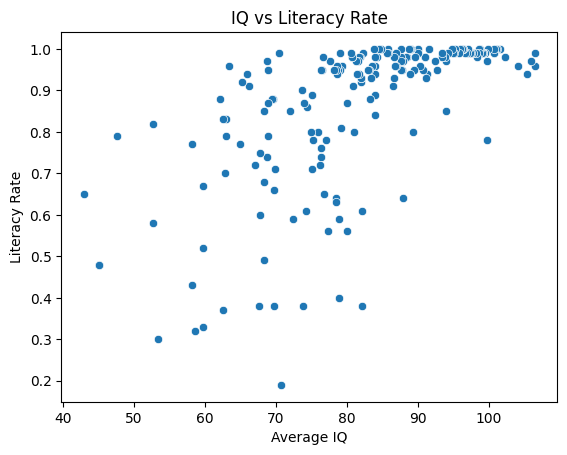

In [129]:
sns.scatterplot(x='Average IQ', y='Literacy Rate', data=df)
plt.title('IQ vs Literacy Rate')
plt.show()


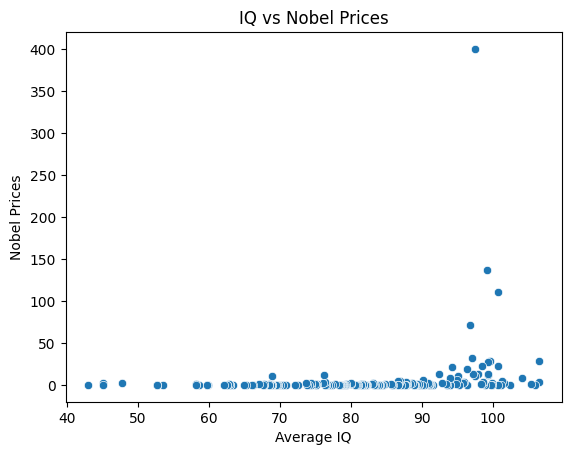

In [130]:
sns.scatterplot(x='Average IQ', y='Nobel Prices', data=df)
plt.title('IQ vs Nobel Prices')
plt.show()

Hypothesis 2: Countries with higher mean years of schooling have higher average IQs.
Rationale: More years in education may contribute to enhanced cognitive skills and intellectual development.

Hypothesis 3: Countries with a higher HDI (Human Development Index) have more Nobel Prize winners.
Rationale: HDI reflects factors like education, income, and healthcare — key contributors to innovation and academic achievement.

Hypothesis 4: Countries with higher GNI (Gross National Income) are more likely to have Nobel Prize winners.
Rationale: Wealthier countries may invest more in research, education, and innovation, creating an environment conducive to Nobel-worthy achievements.

Hypothesis 5: Countries with larger populations have more Nobel Prize winners.
Rationale: Larger populations provide a larger talent pool, increasing the probability of having individuals who excel academically or scientifically.

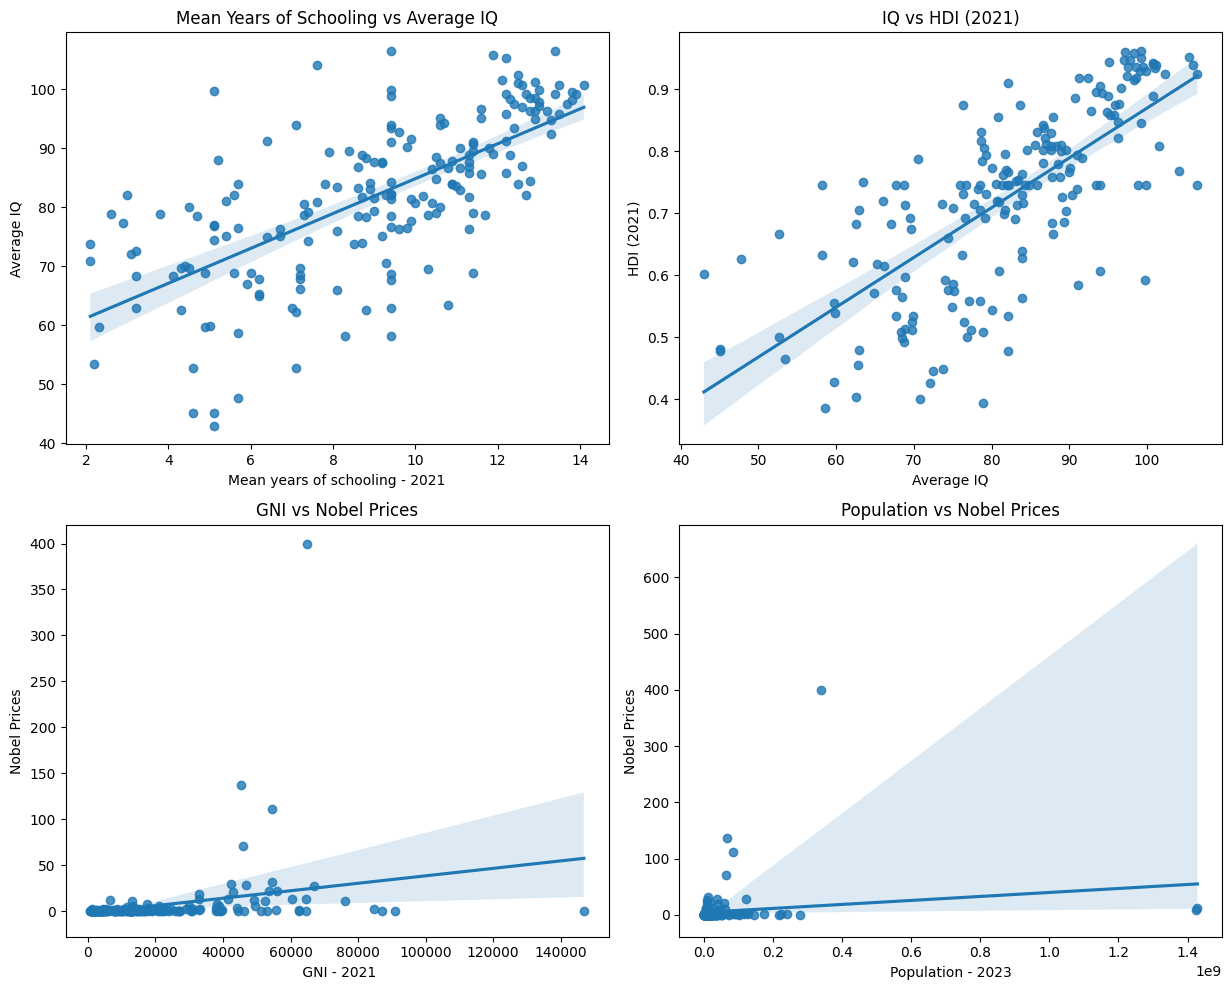

In [141]:
# Check hypothesis 
plt.figure(figsize=(18, 10))

# Mean Years of Schooling vs Average IQ
plt.subplot(2, 3, 2)
sns.regplot(x='Mean years of schooling - 2021', y='Average IQ', data=df)
plt.title('Mean Years of Schooling vs Average IQ')

# IQ vs HDI (2021)
plt.subplot(2, 3, 3)
sns.regplot(x='Average IQ', y='HDI (2021)', data=df)
plt.title('IQ vs HDI (2021)')

# GNI vs Nobel Prices
plt.subplot(2, 3, 5)
sns.regplot(x=' GNI - 2021', y='Nobel Prices', data=df)
plt.title('GNI vs Nobel Prices')

# Population vs Nobel Prices
plt.subplot(2, 3, 6)
sns.regplot(x='Population - 2023', y='Nobel Prices', data=df)
plt.title('Population vs Nobel Prices')

plt.tight_layout()
plt.show()

Hypothesis 6: Countries ranked higher (closer to 1) tend to have better socio-economic indicators such as HDI, GNI, and Mean Years of Schooling.
Rationale: Higher-ranked countries are often associated with stronger education systems, economies, and quality of life.

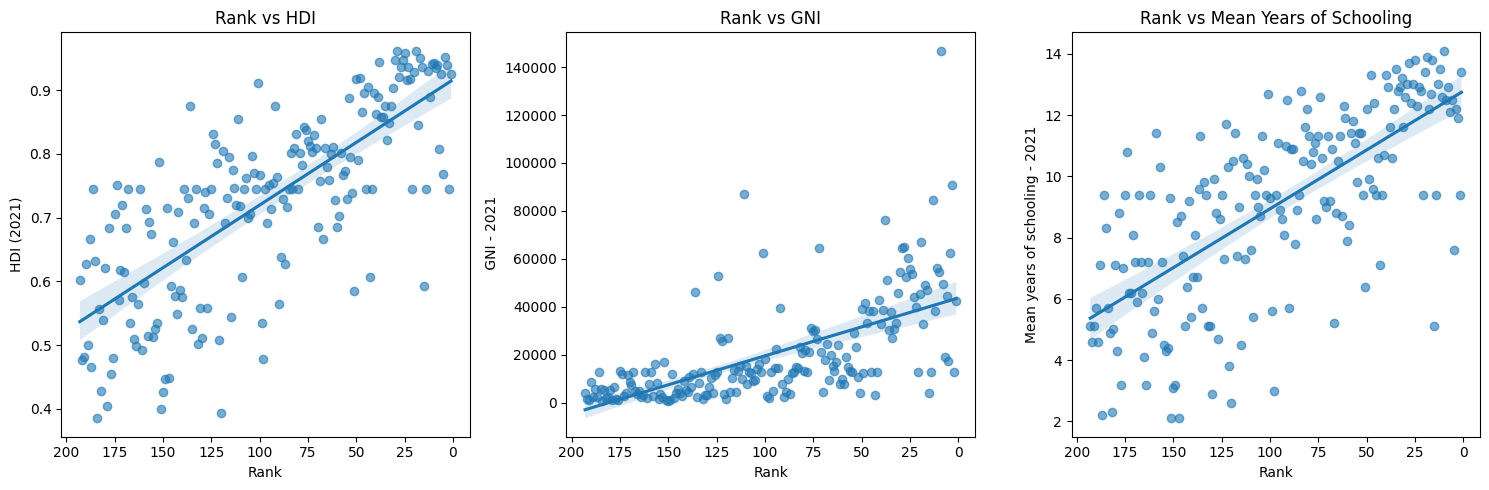

In [142]:
#check hypothesis 
plt.figure(figsize=(15, 5))

# Rank vs HDI
plt.subplot(1, 3, 1)
sns.regplot(x='Rank', y='HDI (2021)', data=df, scatter_kws={'alpha':0.6})
plt.gca().invert_xaxis()  # Invert Rank for better intuition
plt.title('Rank vs HDI')

# Rank vs GNI
plt.subplot(1, 3, 2)
sns.regplot(x='Rank', y=' GNI - 2021', data=df, scatter_kws={'alpha':0.6})
plt.gca().invert_xaxis()
plt.title('Rank vs GNI')

# Rank vs Mean Years of Schooling
plt.subplot(1, 3, 3)
sns.regplot(x='Rank', y='Mean years of schooling - 2021', data=df, scatter_kws={'alpha':0.6})
plt.gca().invert_xaxis()
plt.title('Rank vs Mean Years of Schooling')

plt.tight_layout()
plt.show()


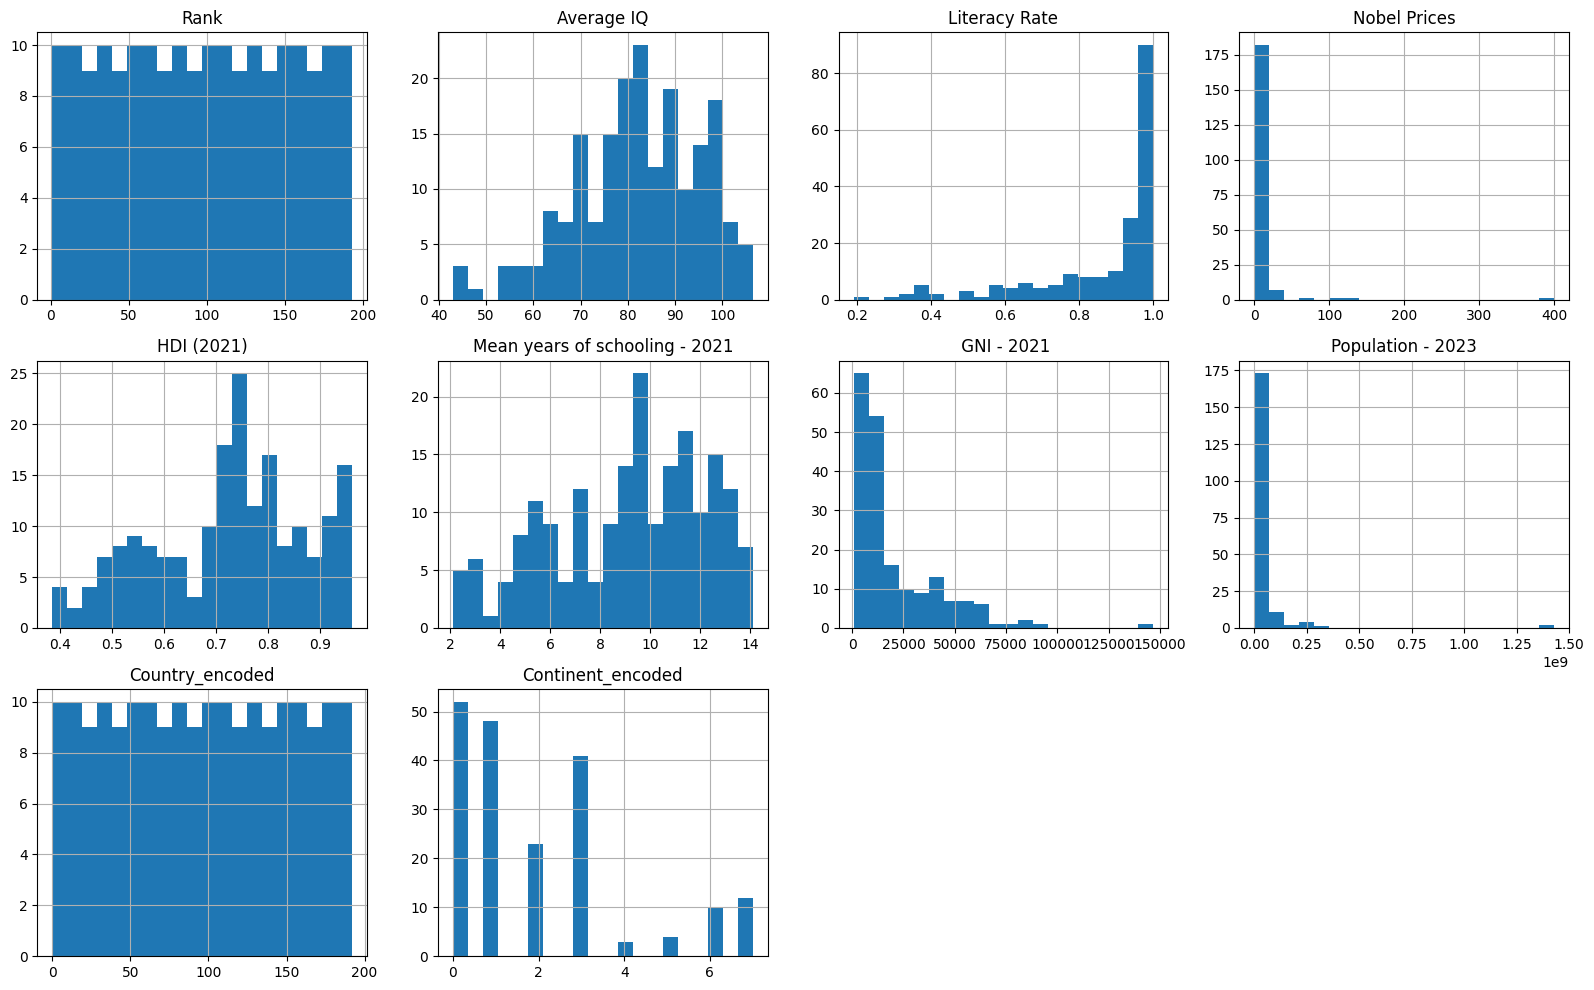

In [145]:
df1.hist(layout=(3, 4), bins=20, figsize=(16, 10))
plt.tight_layout()
plt.show()


## Identifying Leading Countries

Top-10 countries with highest IQ:
     Country  Average IQ
0      Japan      106.48
1     Taiwan      106.47
2  Singapore      105.89
3  Hong Kong      105.37
4      China      104.10

Top-10 countries with highest HDI:
        Country  HDI (2021)
18  Switzerland       0.962
28       Norway       0.961
24      Iceland       0.959
3     Hong Kong       0.952
16    Australia       0.951

Топ-5 стран по числу Нобелевских лауреатов:
           Country  Nobel Prices
27   United States           400
19  United Kingdom           137
9          Germany           111
30          France            71
29          Sweden            32


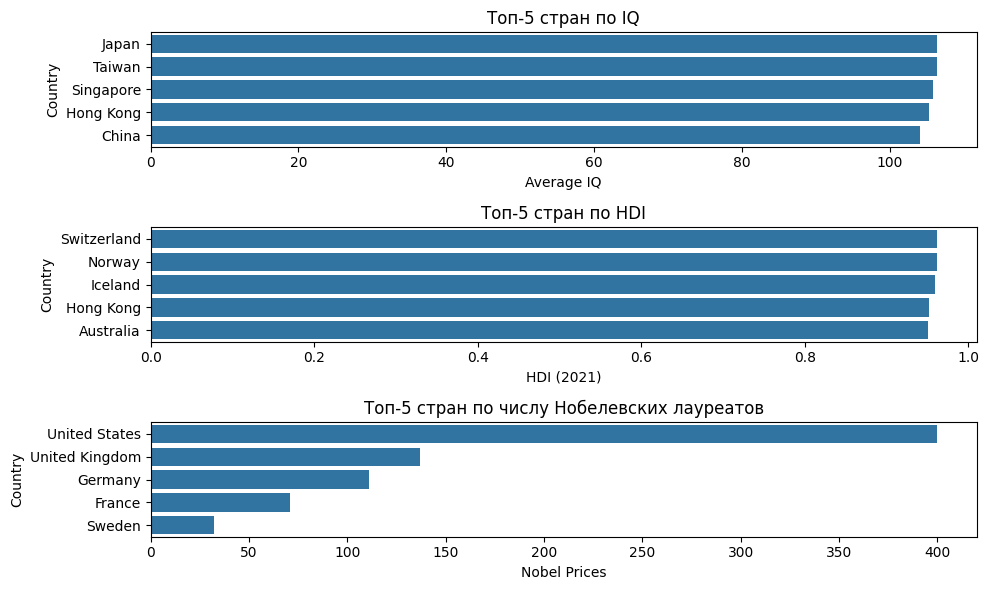

In [136]:
# Этап 6: Выявление стран-лидеров
print("Top-10 countries with highest IQ:")
print(df[['Country', 'Average IQ']].nlargest(5, 'Average IQ'))

print("\nTop-10 countries with highest HDI:")
print(df[['Country', 'HDI (2021)']].nlargest(5, 'HDI (2021)'))

print("\nТоп-5 стран по числу Нобелевских лауреатов:")
print(df[['Country', 'Nobel Prices']].nlargest(5, 'Nobel Prices'))

# Визуализация лидеров
plt.figure(figsize=(10, 6))

# Топ-5 стран по IQ
plt.subplot(3, 1, 1)
sns.barplot(x='Average IQ', y='Country', data=df.nlargest(5, 'Average IQ'))
plt.title('Топ-5 стран по IQ')

# Топ-5 стран по HDI
plt.subplot(3, 1, 2)
sns.barplot(x='HDI (2021)', y='Country', data=df.nlargest(5, 'HDI (2021)'))
plt.title('Топ-5 стран по HDI')

# Топ-5 стран по Нобелевским лауреатам
plt.subplot(3, 1, 3)
sns.barplot(x='Nobel Prices', y='Country', data=df.nlargest(5, 'Nobel Prices'))
plt.title('Топ-5 стран по числу Нобелевских лауреатов')

plt.tight_layout()
plt.show()

In [87]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it contains the necessary columns

# Scatter plot for Average IQ vs Literacy Rate
fig1 = px.scatter(df, x='Literacy Rate', y='Average IQ',
                  title='Average IQ vs Literacy Rate',
                  labels={'Literacy Rate': 'Literacy Rate (%)', 'Average IQ': 'Average IQ'},
                  color='Continent',  # You can add color by continent to better visualize patterns
                  color_continuous_scale='Viridis')

# Scatter plot for Average IQ vs Mean Years of Schooling
fig2 = px.scatter(df, x='Mean years of schooling - 2021', y='Average IQ',
                  title='Average IQ vs Mean Years of Schooling (2021)',
                  labels={'Mean years of schooling - 2021': 'Mean Years of Schooling', 'Average IQ': 'Average IQ'},
                  color='Continent', 
                  color_continuous_scale='Viridis')

# Scatter plot for Average IQ vs HDI (2021)
fig3 = px.scatter(df, x='HDI (2021)', y='Average IQ',
                  title='Average IQ vs HDI (2021)',
                  labels={'HDI (2021)': 'Human Development Index (2021)', 'Average IQ': 'Average IQ'},
                  color='Continent', 
                  color_continuous_scale='Viridis')

# Show the plots
fig1.show()
fig2.show()
fig3.show()


In [88]:
# Assuming df is your DataFrame
# Create an empty list to store the highest and lowest IQ countries in each continent
highest_lowest_iq = []

# Loop through each continent to find the countries with the highest and lowest IQ
for continent in df['Continent'].unique():
    continent_data = df[df['Continent'] == continent]
    
    # Find the country with the highest IQ
    highest_iq_country = continent_data.loc[continent_data['Average IQ'].idxmax()]
    
    # Find the country with the lowest IQ
    lowest_iq_country = continent_data.loc[continent_data['Average IQ'].idxmin()]
    
    highest_lowest_iq.append({
        'Continent': continent,
        'Highest Country': highest_iq_country['Country'],
        'Highest IQ': highest_iq_country['Average IQ'],
        'Lowest Country': lowest_iq_country['Country'],
        'Lowest IQ': lowest_iq_country['Average IQ']
    })

# Convert the list into a DataFrame
highest_lowest_iq_df = pd.DataFrame(highest_lowest_iq)

# Create the figure
fig = go.Figure()

# Add bars for the highest IQ countries (soft green color)
fig.add_trace(go.Bar(
    x=highest_lowest_iq_df['Continent'],
    y=highest_lowest_iq_df['Highest IQ'],
    name='Highest IQ',
    marker=dict(color='lightblue'),
    text=highest_lowest_iq_df['Highest Country'],  # Show country names as hover text
    hoverinfo='text+y'  # Display country name and IQ value on hover
))

# Add bars for the lowest IQ countries (soft red color)
fig.add_trace(go.Bar(
    x=highest_lowest_iq_df['Continent'],
    y=highest_lowest_iq_df['Lowest IQ'],
    name='Lowest IQ',
    marker=dict(color='lightyellow'),
    text=highest_lowest_iq_df['Lowest Country'],  # Show country names as hover text
    hoverinfo='text+y'  # Display country name and IQ value on hover
))

# Update the layout
fig.update_layout(
    title="Country with Highest and Lowest IQ in Each Continent",
    xaxis_title="Continent",
    yaxis_title="Average IQ",
    barmode='group',  # Group the bars together
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend_title="IQ Rank"
)

# Show the figure
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)


In [159]:
import pandas as pd
import pycountry
import geopandas as gpd
import plotly.express as px
import geodatasets

# Assuming df1 is your data with 'Country' and 'Rank'
rank_location = df1[['Country', 'Rank', 'Average IQ']]

# Get the ISO alpha-3 code for each country using pycountry
rank_location['ISO_alpha'] = rank_location['Country'].apply(
    lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None
)

# Load the Natural Earth shapefile (update with your file path)
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

# Merge the shapefile data with the rank data
world = world.merge(rank_location, how='left', left_on='ISO_A3', right_on='ISO_alpha')

# Create a choropleth map using Plotly
fig = px.choropleth(
    world,
    locations='ISO_A3',
    color='Average IQ',
    hover_name="Country", 
    projection="winkel3", 
    color_continuous_scale='Viridis',
    labels={'Average IQ': 'Average IQ'},
    title='Average IQ by Country'
)

# Display the map
fig.show()
fig = px.choropleth(
    world,
    locations='ISO_A3',
    color='Rank',
    hover_name='Country', 
    projection="winkel3", 
    color_continuous_scale='YlOrRd',
    labels={'Rank': 'Rank'},
    title='Rank by Country'
)
fig.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Подготовка данных
X = df[['Literacy Rate', 'Mean years of schooling - 2021', 'HDI (2021)']]  # независимые переменные
y = df['Average IQ']  # зависимая переменная

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз
y_pred = model.predict(X_test)

# Оценка модели
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')



MSE: 47.52
R-squared: 0.62


In [161]:
# Загрузка данных

path2 = kagglehub.dataset_download("mexwell/global-iq-1950-2050")

print("Path to dataset files:", path2)


Path to dataset files: /Users/Gala/.cache/kagglehub/datasets/mexwell/global-iq-1950-2050/versions/1


In [168]:
df = pd.read_csv('avgIQpercountry.csv')  # Датасет с 81 страной
df2 = pd.read_csv('cfacts.csv')  # Датасет с IQ по годам

# Приведение колонок к единому формату (например, названия стран)
df1['Country'] = df1['Country'].str.strip()
df2['Country'] = df2['Country'].str.strip()

# Фильтрация данных по 1950 году
df_1950 = df2[df2['Year'] == 1950]

# Объединение данных по названию страны
merged_df = pd.merge(df1, df_1950[['Country', 'IQ']], on='Country', how='left')

# Переименование колонок для ясности
merged_df.rename(columns={'IQ': 'IQ_1950'}, inplace=True)

# Вывод результата
print(merged_df.head())

# Сохранение объединённых данных
merged_df.to_csv('merged_IQ_data.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'cfacts.csv'